In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import mean_squared_error 

In [40]:
df = pd.read_csv(r"C:\Users\h.rahnavard\Downloads\1632300362534233.csv")
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


# assinging numerical values to the state of parkings, warehouses and elevators

In [41]:
le = LabelEncoder()
df["Parking"] = le.fit_transform(df["Parking"])
df["Warehouse"] = le.fit_transform(df["Warehouse"])
df["Elevator"] = le.fit_transform(df["Elevator"])
df.describe()

,Room,Parking,Warehouse,Elevator,Price,Price(USD)
count,3479.000000,3479.000000,3479.000000,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,0.847945,0.914631,0.787295,5.359023e+09,1.786341e+05
std,0.758275,0.359126,0.279471,0.409279,8.099935e+09,2.699978e+05
min,0.000000,0.000000,0.000000,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.000000,1.000000,1.000000,1.418250e+09,4.727500e+04
50%,2.000000,1.000000,1.000000,1.000000,2.900000e+09,9.666667e+04
75%,2.000000,1.000000,1.000000,1.000000,6.000000e+09,2.000000e+05
max,5.000000,1.000000,1.000000,1.000000,9.240000e+10,3.080000e+06


# Deleting rows with no addresses

In [42]:
bad_indexes = []
for i in range(len(df)):
    address = df.loc[i, "Address"]
    if address == "" or address is None or address is np.nan or str(address).strip() == 'nan':
        bad_indexes.append(i)
df = df.drop(bad_indexes).reset_index(drop=True)
df.describe()

,Room,Parking,Warehouse,Elevator,Price,Price(USD)
count,3456.000000,3456.000000,3456.000000,3456.000000,3.456000e+03,3.456000e+03
mean,2.081308,0.847512,0.914931,0.787326,5.379957e+09,1.793319e+05
std,0.759723,0.359546,0.279025,0.409258,8.121729e+09,2.707243e+05
min,0.000000,0.000000,0.000000,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.000000,1.000000,1.000000,1.420000e+09,4.733333e+04
50%,2.000000,1.000000,1.000000,1.000000,2.900000e+09,9.666667e+04
75%,2.000000,1.000000,1.000000,1.000000,6.000000e+09,2.000000e+05
max,5.000000,1.000000,1.000000,1.000000,9.240000e+10,3.080000e+06


# there can be no houses with an area that's greater than 100000 but we also have to find out the maximum area for houses with valid area entries, which, after taking a cursory look, did not go higher than 750. Cheking here: 

In [59]:
for i in range(len(df)):
    rawvalue = df.loc[i,"Area"]
    converted = str(rawvalue).replace("," , "").strip()
    df.loc[i,"Area"] = int(converted)
df["Area"] = pd.to_numeric(df["Area"])
df["Area"].describe()
print(df["Area"].max())
print(df["Area"].min())
print(df["Area"].mean())
print(df["Area"].dtype)
(df["Area"] > 800) & (df["Area"] < 100000).any()

16160000000
30
8802191.396122685
int64


0       False
1       False
2       False
3       False
4       False
        ...  
3451    False
3452    False
3453    False
3454    False
3455    False
Name: Area, Length: 3456, dtype: bool

# Deleting rows with invalid area entries:

In [62]:
wrong_areas = []
for i in range(len(df)):
    if df.loc[i,"Area"] > 800:
        wrong_areas.append(i)
df = df.drop(wrong_areas).reset_index(drop=True)
df.describe()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
count,3447.000000,3447.000000,3447.000000,3447.000000,3447.000000,3.447000e+03,3.447000e+03
mean,106.229475,2.080070,0.847404,0.914999,0.787932,5.352295e+09,1.784098e+05
std,65.548021,0.758756,0.359650,0.278924,0.408832,8.029127e+09,2.676376e+05
min,30.000000,0.000000,0.000000,0.000000,0.000000,3.600000e+06,1.200000e+02
25%,69.000000,2.000000,1.000000,1.000000,1.000000,1.418250e+09,4.727500e+04
50%,90.000000,2.000000,1.000000,1.000000,1.000000,2.900000e+09,9.666667e+04
75%,120.000000,2.000000,1.000000,1.000000,1.000000,6.000000e+09,2.000000e+05
max,750.000000,5.000000,1.000000,1.000000,1.000000,9.240000e+10,3.080000e+06


# In an attempt to assign numerical values to addresses, first we ignore repetitions 

In [65]:
unique_addresses = df["Address"].drop_duplicates()
print(list(unique_addresses))

['Shahran', 'Pardis', 'Shahrake Qods', 'Shahrake Gharb', 'North Program Organization', 'Andisheh', 'West Ferdows Boulevard', 'Narmak', 'Saadat Abad', 'Zafar', 'Islamshahr', 'Pirouzi', 'Shahrake Shahid Bagheri', 'Moniriyeh', 'Velenjak', 'Amirieh', 'Southern Janatabad', 'Salsabil', 'Zargandeh', 'Feiz Garden', 'Water Organization', 'ShahrAra', 'Gisha', 'Ray', 'Abbasabad', 'Ostad Moein', 'Farmanieh', 'Parand', 'Punak', 'Qasr-od-Dasht', 'Aqdasieh', 'Pakdasht', 'Railway', 'Central Janatabad', 'East Ferdows Boulevard', 'Pakdasht KhatunAbad', 'Sattarkhan', 'Baghestan', 'Shahryar', 'Northern Janatabad', 'Daryan No', 'Southern Program Organization', 'Rudhen', 'West Pars', 'Afsarieh', 'Marzdaran', 'Dorous', 'Sadeghieh', 'Chahardangeh', 'Baqershahr', 'Jeyhoon', 'Lavizan', 'Shams Abad', 'Fatemi', 'Keshavarz Boulevard', 'Kahrizak', 'Qarchak', 'Northren Jamalzadeh', 'Azarbaijan', 'Bahar', 'Persian Gulf Martyrs Lake', 'Beryanak', 'Heshmatieh', 'Elm-o-Sanat', 'Golestan', 'Shahr-e-Ziba', 'Pasdaran', 'Ch

# Trying to calculate each places's coordinate to be able to calculate the distance between them and uptown, assinging the distance as numerical values later on.

In [73]:
import time
from geopy.geocoders import Nominatim
geolocater = Nominatim(user_agent = 'me')
def get_coords(place):
    location = geolocater.geocode(f"{place}, Tehran, Iran")
    if location:
        return (location.latitude, location.longitude)
    else:
        return None

coordinates = []
for i in unique_addresses:
    place = i
    coord = get_coords(place)
    print(f"{place}, {coord}")
    coordinates.append(coord)
    time.sleep(1)
print(coordinates)


Shahran, (35.753978, 51.2874715)
Pardis, (35.7411286, 51.815509)
Shahrake Qods, None
Shahrake Gharb, None
North Program Organization, None
Andisheh, (35.7052413, 51.0296232)
West Ferdows Boulevard, None
Narmak, (35.7363694, 51.5041892)
Saadat Abad, (35.7860955, 51.3781445)
Zafar, (35.7668336, 51.4194241)
Islamshahr, (35.5478513, 51.2318676)
Pirouzi, (35.6909048, 51.4571519)
Shahrake Shahid Bagheri, None
Moniriyeh, (35.6811307, 51.401641)
Velenjak, (35.8066647, 51.4013931)
Amirieh, (35.6289081, 51.027627)
Southern Janatabad, None
Salsabil, (35.6961197, 51.37395)
Zargandeh, (35.7732674, 51.4329527)
Feiz Garden, None
Water Organization, (35.7164354, 51.396155)
ShahrAra, (35.717269, 51.3739168)
Gisha, (35.7369191, 51.3770576)
Ray, (35.5989911, 51.4357865)
Abbasabad, (35.5866299, 51.3384738)
Ostad Moein, (35.7001565, 51.3447089)
Farmanieh, (35.7961378, 51.4710658)
Parand, (35.477882, 50.9469189)
Punak, (35.7579873, 51.324842)
Qasr-od-Dasht, None
Aqdasieh, None
Pakdasht, (35.4784573, 51.6824

# Checking for places that are not found through Nominatim

In [78]:
Manual_edit = []
for place, coord in zip(unique_addresses, coordinates):
    if coord == None:
        Manual_edit.append(f"{place}")
print(Manual_edit)

['Shahrake Qods', 'Shahrake Gharb', 'North Program Organization', 'West Ferdows Boulevard', 'Shahrake Shahid Bagheri', 'Southern Janatabad', 'Feiz Garden', 'Qasr-od-Dasht', 'Aqdasieh', 'Railway', 'Central Janatabad', 'East Ferdows Boulevard', 'Northern Janatabad', 'Southern Program Organization', 'Rudhen', 'West Pars', 'Dorous', 'Jeyhoon', 'Northren Jamalzadeh', 'Azarbaijan', 'Chardivari', 'Gheitarieh', 'Dehkade Olampic', 'Republic', 'Qazvin Imamzadeh Hassan', 'Southern Chitgar', 'Si Metri Ji', 'Northern Chitgar', 'East Pars', 'Sohanak', 'Azadshahr', 'Mahmoudieh', 'Tenant', 'Chardangeh', 'Shahrakeh Naft', 'Nawab', 'Northern Suhrawardi', 'Villa', 'Hakimiyeh', 'Garden of Saba', 'Shahrake Apadana', 'Shahrake Azadi', 'Shahrake Madaen', 'Islamshahr Elahieh', 'Ray - Montazeri', 'Firoozkooh Kuhsar', 'Southern Suhrawardi', 'Dolatabad', 'Kazemabad', 'Ray - Pilgosh', 'Ghiyamdasht', 'Argentina', 'Shahrake Quds', 'Khademabad Garden', 'Chidz', 'Boloorsazi', 'Mehrabad River River', 'Varamin - Behesh

# assigning imaginary coordinates to the not-found places:

In [79]:
imaginary_coords = {
    'Shahrake Qods': (35.700, 51.150),
    'Shahrake Gharb': (35.750, 51.300),
    'North Program Organization': (35.800, 51.400),
    'West Ferdows Boulevard': (35.720, 51.280),
    'Shahrake Shahid Bagheri': (35.770, 51.320),
    'Southern Janatabad': (35.680, 51.250),
    'Feiz Garden': (35.730, 51.200),
    'Qasr-od-Dasht': (35.690, 51.220),
    'Aqdasieh': (35.760, 51.340),
    'Railway': (35.710, 51.180),
    'Central Janatabad': (35.690, 51.240),
    'East Ferdows Boulevard': (35.730, 51.290),
    'Northern Janatabad': (35.700, 51.270),
    'Southern Program Organization': (35.670, 51.230),
    'Rudhen': (35.790, 51.380),
    'West Pars': (35.740, 51.310),
    'Dorous': (35.720, 51.210),
    'Jeyhoon': (35.710, 51.260),
    'Northren Jamalzadeh': (35.780, 51.370),
    'Azarbaijan': (35.690, 51.330),
    'Chardivari': (35.705, 51.225),
    'Gheitarieh': (35.760, 51.315),
    'Dehkade Olampic': (35.715, 51.240),
    'Republic': (35.725, 51.280),
    'Qazvin Imamzadeh Hassan': (35.695, 51.210),
    'Southern Chitgar': (35.680, 51.290),
    'Si Metri Ji': (35.750, 51.270),
    'Northern Chitgar': (35.770, 51.295),
    'East Pars': (35.735, 51.325),
    'Sohanak': (35.710, 51.355),
    'Azadshahr': (35.700, 51.360),
    'Mahmoudieh': (35.745, 51.330),
    'Tenant': (35.730, 51.310),
    'Chardangeh': (35.695, 51.275),
    'Shahrakeh Naft': (35.740, 51.290),
    'Nawab': (35.710, 51.300),
    'Northern Suhrawardi': (35.720, 51.320),
    'Villa': (35.700, 51.295),
    'Hakimiyeh': (35.715, 51.310),
    'Garden of Saba': (35.725, 51.335),
    'Shahrake Apadana': (35.735, 51.320),
    'Shahrake Azadi': (35.750, 51.335),
    'Shahrake Madaen': (35.720, 51.340),
    'Islamshahr Elahieh': (35.690, 51.300),
    'Ray - Montazeri': (35.700, 51.310),
    'Firoozkooh Kuhsar': (35.780, 51.290),
    'Southern Suhrawardi': (35.670, 51.280),
    'Dolatabad': (35.685, 51.265),
    'Kazemabad': (35.700, 51.285),
    'Ray - Pilgosh': (35.705, 51.295),
    'Ghiyamdasht': (35.715, 51.310),
    'Argentina': (35.720, 51.320),
    'Shahrake Quds': (35.730, 51.330),
    'Khademabad Garden': (35.740, 51.340),
    'Chidz': (35.750, 51.350),
    'Boloorsazi': (35.760, 51.360),
    'Mehrabad River River': (35.770, 51.370),
    'Varamin - Beheshti': (35.780, 51.380),
    'Thirteen November': (35.790, 51.390),
    'Aliabad South': (35.800, 51.400),
    'Vahidiyeh': (35.810, 51.410),
    'Naziabad': (35.820, 51.420),
    'Yakhchiabad': (35.830, 51.430),
}
for i, (place, coord) in enumerate(zip(unique_addresses, coordinates)):
    if coord == None:
        coordinates[i] = imaginary_coords[place]
print(coordinates)

[(35.753978, 51.2874715), (35.7411286, 51.815509), (35.7, 51.15), (35.75, 51.3), (35.8, 51.4), (35.7052413, 51.0296232), (35.72, 51.28), (35.7363694, 51.5041892), (35.7860955, 51.3781445), (35.7668336, 51.4194241), (35.5478513, 51.2318676), (35.6909048, 51.4571519), (35.77, 51.32), (35.6811307, 51.401641), (35.8066647, 51.4013931), (35.6289081, 51.027627), (35.68, 51.25), (35.6961197, 51.37395), (35.7732674, 51.4329527), (35.73, 51.2), (35.7164354, 51.396155), (35.717269, 51.3739168), (35.7369191, 51.3770576), (35.5989911, 51.4357865), (35.5866299, 51.3384738), (35.7001565, 51.3447089), (35.7961378, 51.4710658), (35.477882, 50.9469189), (35.7579873, 51.324842), (35.69, 51.22), (35.76, 51.34), (35.4784573, 51.6824624), (35.71, 51.18), (35.69, 51.24), (35.73, 51.29), (35.5076412, 51.6680495), (35.7246873, 51.3585026), (35.635564, 51.1346204), (35.8019146, 51.4069631), (35.7, 51.27), (35.7146676, 51.3623258), (35.67, 51.23), (35.79, 51.38), (35.74, 51.31), (35.6523159, 51.4930224), (35.73

# Assinging a coordinate to uptown

In [83]:
from geopy.geocoders import Nominatim
uptown = get_coords("Niavaran")
print(uptown)

(35.8160561, 51.4709472)


# Calculating the distance between each coordinate and uptown:

In [90]:
dists = {}
from geopy.distance import distance
for place,coord in zip(unique_addresses, coordinates):
    if isinstance(coord, tuple) and len(coord) == 2:
        dist = distance(uptown, coord).km
        dists[place] = int(dist)
print(dists)

{'Shahran': 17, 'Pardis': 32, 'Shahrake Qods': 31, 'Shahrake Gharb': 17, 'North Program Organization': 6, 'Andisheh': 41, 'West Ferdows Boulevard': 20, 'Narmak': 9, 'Saadat Abad': 9, 'Zafar': 7, 'Islamshahr': 36, 'Pirouzi': 13, 'Shahrake Shahid Bagheri': 14, 'Moniriyeh': 16, 'Velenjak': 6, 'Amirieh': 45, 'Southern Janatabad': 25, 'Salsabil': 15, 'Zargandeh': 5, 'Feiz Garden': 26, 'Water Organization': 12, 'ShahrAra': 14, 'Gisha': 12, 'Ray': 24, 'Abbasabad': 28, 'Ostad Moein': 17, 'Farmanieh': 2, 'Parand': 60, 'Punak': 14, 'Qasr-od-Dasht': 26, 'Aqdasieh': 13, 'Pakdasht': 42, 'Railway': 28, 'Central Janatabad': 25, 'East Ferdows Boulevard': 18, 'Pakdasht KhatunAbad': 38, 'Sattarkhan': 14, 'Baghestan': 36, 'Shahryar': 5, 'Northern Janatabad': 22, 'Daryan No': 14, 'Southern Program Organization': 27, 'Rudhen': 8, 'West Pars': 16, 'Afsarieh': 18, 'Marzdaran': 14, 'Dorous': 25, 'Sadeghieh': 15, 'Chahardangeh': 27, 'Baqershahr': 31, 'Jeyhoon': 22, 'Lavizan': 7, 'Shams Abad': 7, 'Fatemi': 13, 

# Replacing all addresses with numerical data showing their distance from uptown

In [93]:
for i in range(len(df)):
    for place in dists:
        if df.loc[i,"Address"] == place:
            df.loc[i,"Address"] = dists[place]
print(df["Address"])

0       17
1       17
2       32
3       31
4       17
        ..
3442    25
3443     0
3444    60
3445    25
3446    60
Name: Address, Length: 3447, dtype: object


# splitting the data

In [96]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

# Drawing some rudimentary graphs

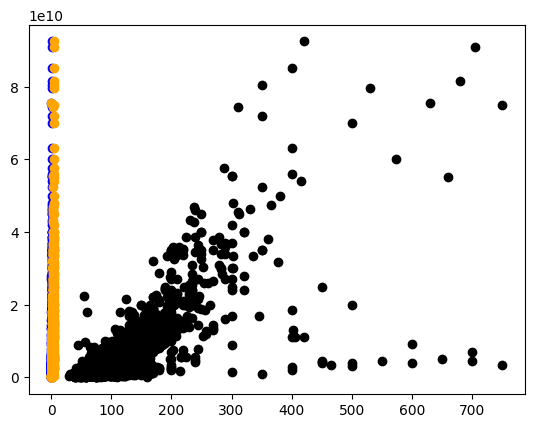

In [114]:
plt.scatter(df["Parking"], df["Price"], color='blue')
plt.scatter(df["Area"], df["Price"], color='black')
plt.scatter(df["Room"], df["Price"], color='orange')

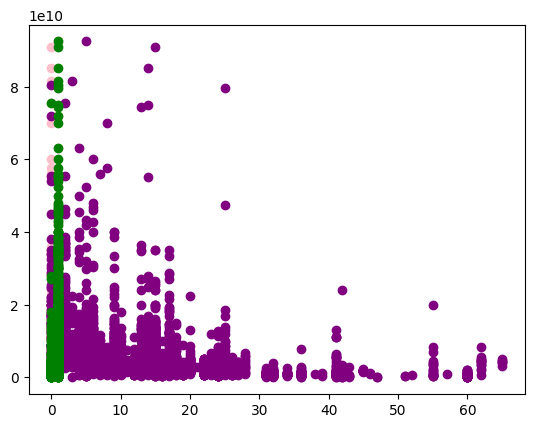

In [115]:
plt.scatter(df["Elevator"], df["Price"], color='pink')
plt.scatter(df["Address"], df["Price"], color='purple')
plt.scatter(df["Warehouse"], df["Price"], color='green')

# Getting into the regression model

In [133]:
x_train = train[["Area", "Room", "Elevator", "Parking", "Warehouse", "Address"]]
y_train = train["Price"]
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
coefficients = model.coef_
print(f"the coefficient for Area is: {coefficients[0]}")
print(f"the coefficient for Rooms is: {coefficients[1]}")
print(f"the coefficient for Elevator is: {coefficients[2]}")
print(f"the coefficient for Parking is: {coefficients[3]}")
print(f"the coefficient for Warehouse is: {coefficients[4]}")
print(f"the coefficient for Address is: {coefficients[5]}")
intercept = model.intercept_
print(f"intercept is {intercept}")
features = x_train.columns
equation = f"Price = {intercept:.2f}"
for coef, feature in zip(coefficients, features):
    equation += f" + ({coef:.2f} * {feature})"

print(equation)

the coefficient for Area is: 85117283.73501669
the coefficient for Rooms is: 448726040.03947645
the coefficient for Elevator is: 468854633.0359222
the coefficient for Parking is: -833571573.780176
the coefficient for Warehouse is: -21146212.723590508
the coefficient for Address is: -155728643.59814155
intercept is -1182680947.1947536
Price = -1182680947.19 + (85117283.74 * Area) + (448726040.04 * Room) + (468854633.04 * Elevator) + (-833571573.78 * Parking) + (-21146212.72 * Warehouse) + (-155728643.60 * Address)


In [120]:
for i in range(10):
    print(f"True: {y_train.iloc[i]}, Predicted: {y_pred[i]}")


True: 1850000000.0, Predicted: 1595183873.514523
True: 550000000.0, Predicted: 1069856799.342143
True: 902500000.0, Predicted: 2587461982.700553
True: 2050000000.0, Predicted: 3883891346.242751
True: 600000000.0, Predicted: 1750795069.2222767
True: 493000000.0, Predicted: -2928487719.452471
True: 2100000000.0, Predicted: 2926130306.034672
True: 1690000000.0, Predicted: 2908529042.4646807
True: 11000000000.0, Predicted: 9952026815.034826
True: 570000000.0, Predicted: -998943414.1059132


In [127]:
x_test = test[["Area", "Room", "Elevator", "Parking", "Warehouse", "Address"]]
y_test = test["Price"]
model.fit(x_test, y_test)
y_test_pred = model.predict(x_test)
for i in range(10):
    print(f"True: {y_test.iloc[i]}, Predicted: {y_test_pred[i]}")

True: 1850000000.0, Predicted: 1400145441.9848242
True: 7000000000.0, Predicted: 6845869281.66393
True: 2150000000.0, Predicted: 1331201835.7917013
True: 2370000000.0, Predicted: 1559956234.869357
True: 2450000000.0, Predicted: 2455402065.802371
True: 5000000000.0, Predicted: 6910677892.38921
True: 1450000000.0, Predicted: 3433600423.24436
True: 7150000000.0, Predicted: 7201068037.493894
True: 4059000000.0, Predicted: 7643961115.317016
True: 1500000000.0, Predicted: 4827088267.439006


In [128]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_test_pred)
print(r2)

0.6469418121222745


# Let's ignore some data and try again:

In [125]:
x_train2 = train[["Area", "Room", "Elevator", "Warehouse", "Address"]]
y_train2 = train["Price"]
model = LinearRegression()
model.fit(x_train2, y_train2)
y_pred2 = model.predict(x_train2)
coefficients2 = model.coef_
print(f"the coefficient2 for Area is: {coefficients2[0]}")
print(f"the coefficient2 for Rooms is: {coefficients2[1]}")
print(f"the coefficient2 for Elevator is: {coefficients2[2]}")
print(f"the coefficient2 for Warehouse is: {coefficients2[3]}")
print(f"the coefficient2 for Address is: {coefficients2[4]}")
intercept2 = model.intercept_
print(f"intercept2 is {intercept}")

the coefficient2 for Area is: 84844019.83890145
the coefficient2 for Rooms is: 404312217.68479955
the coefficient2 for Elevator is: 232322050.14726403
the coefficient2 for Warehouse is: -373498830.3717992
the coefficient2 for Address is: -153525063.53630263
intercept2 is -1182680947.1947536


In [126]:
for i in range(10):
    print(f"True: {y_train2.iloc[i]} , Predicted = {y_pred2[i]}")

True: 1850000000.0 , Predicted = 1694280561.0358095
True: 550000000.0 , Predicted = 1153221143.0984926
True: 902500000.0 , Predicted = 2664250524.0572186
True: 2050000000.0 , Predicted = 4148954566.344984
True: 600000000.0 , Predicted = 1831973301.8097038
True: 493000000.0 , Predicted = -2581926974.848032
True: 2100000000.0 , Predicted = 3007325089.1651325
True: 1690000000.0 , Predicted = 2158884890.776118
True: 11000000000.0 , Predicted = 9924718952.935637
True: 570000000.0 , Predicted = -1455017696.3012047


In [130]:
x_test2 = test[["Area", "Room", "Elevator", "Warehouse", "Address"]]
y_test2 = test["Price"]
model.fit(x_test2, y_test2)
y_test_pred2 = model.predict(x_test2)
for i in range(10):
    print(f"True: {y_test2.iloc[i]}, Predicted: {y_test_pred2[i]}")

True: 1850000000.0, Predicted: 1496105337.5446806
True: 7000000000.0, Predicted: 6885113958.481762
True: 2150000000.0, Predicted: 1427532011.7580462
True: 2370000000.0, Predicted: 1650425585.3016171
True: 2450000000.0, Predicted: 2513594704.3208184
True: 5000000000.0, Predicted: 6965015289.442809
True: 1450000000.0, Predicted: 3031611010.864365
True: 7150000000.0, Predicted: 7250757656.711793
True: 4059000000.0, Predicted: 7685095739.676487
True: 1500000000.0, Predicted: 4414526590.7195


In [131]:
from sklearn.metrics import r2_score
r22 = r2_score(y_test2, y_test_pred2)
print(r22)

0.6462290345211745


# So, the original model was better :)